## Clustering (Hierarchical,KMeans and DBScan) (1)

Name: SAI AKHIL SN | Batch date: 27 Jan 2021

#### Business Problem: 
Perform clustering for the airlines data to obtain optimum number of clusters.

In [2]:
import os
os.chdir("C://Users/oftog/Downloads/ExcelR_assignments")

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [2]:
data=pd.read_excel('C://Users/oftog/Downloads/EastWestAirlines.xlsx')

In [4]:
data1=data.copy()

In [5]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
data=data.rename(columns={'Award?':'Award','ID#':'ID'})
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:

data=  data.drop(['ID','Award'], axis=1)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [8]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [9]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [10]:
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000


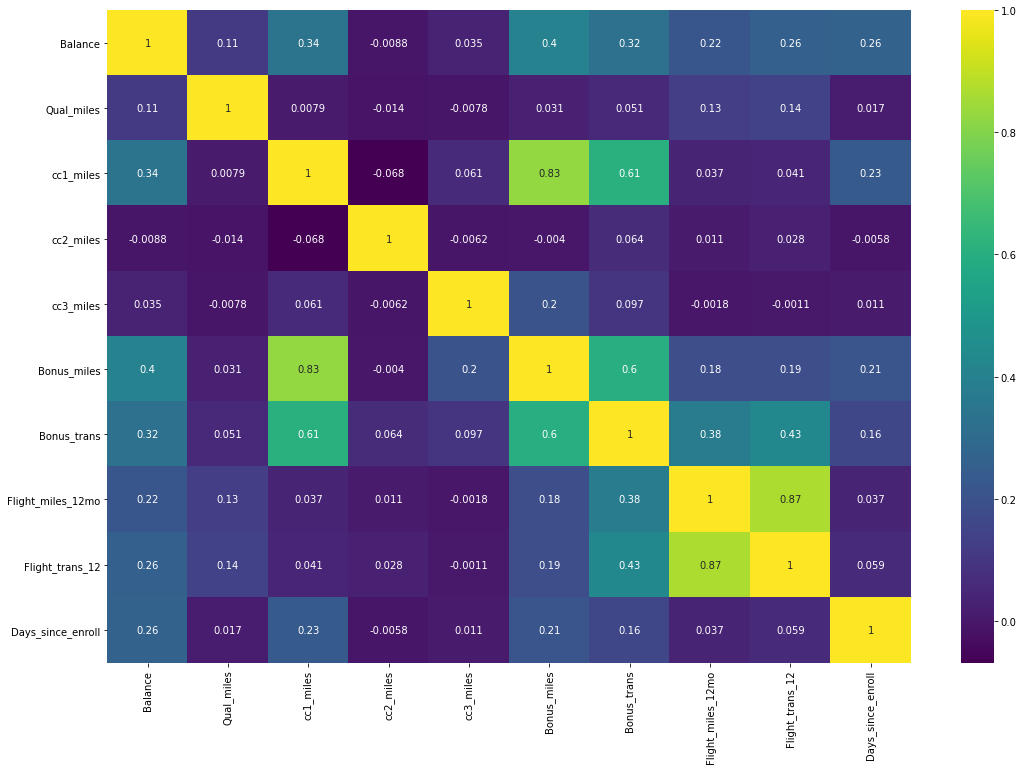

In [11]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

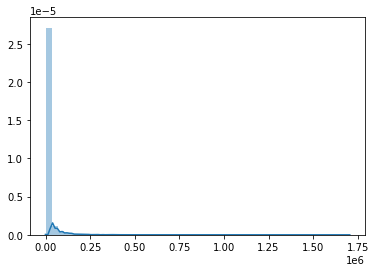

In [12]:
sns.distplot(data)

### Applying Normalization

In [13]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
data_norm = norm_func(data.iloc[:,0:])
data_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


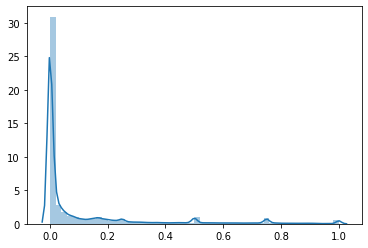

In [15]:
sns.distplot(data_norm)

In [16]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   cc2_miles          3999 non-null   float64
 4   cc3_miles          3999 non-null   float64
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   float64
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   float64
dtypes: float64(10)
memory usage: 312.5 KB


STANDARDIZATION

In [10]:
from sklearn.preprocessing import StandardScaler

std_data = StandardScaler().fit_transform(data)      # this will used for kmeans
std_data.shape


(3999, 10)

APPLYING PCA ON STD_DATA

In [11]:
# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_data= pca_std.fit_transform(std_data)

In [12]:
# eigenvalues..

print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [13]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [14]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

Conclusion:

by applying PCA on standardized data with 95% variance it gives 8 PCA components.

### Normalization by MinMaxScaler

In [15]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3999, 10)

### Applying PCA with normalised data

In [16]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)


In [17]:
# eigenvalues..

print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [18]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


=> By applying PCA on MinMaxscalr transformation data gives 5 PCA components.

=> How many numbers of cluster. Also deciding which transformation data we will use to build model.
    
=> First Stage: Taking stadardization transformation data & PCA applied on it.

model1


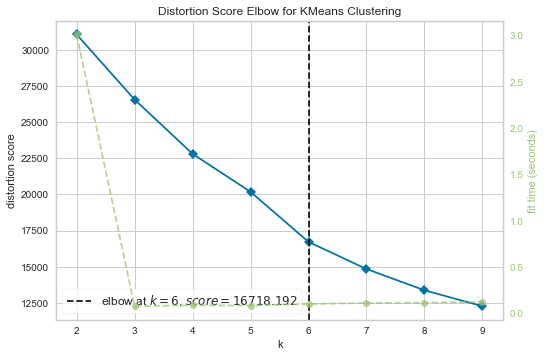

model2


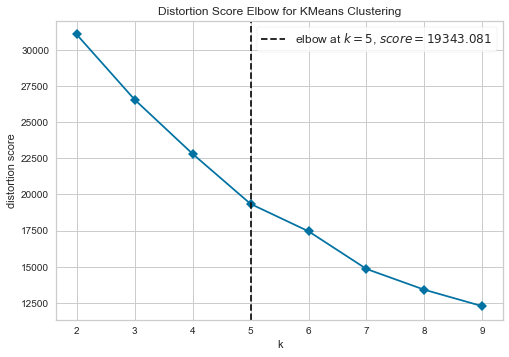

In [28]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(random_state=0,n_jobs=-1,)
model2 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20,)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='distortion', timings=True)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='distortion', timings=False)
# Fit the data and visualize
print('model1')
visualizer1.fit(pca_std_data)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(pca_std_data)    
visualizer2.poof()
plt.show()


Conclusion:

=> Since we don't know true labels so we have used silhoutte score method to determine good k numbers based on score.

=>Also it is proved that even if we feed data either PCA or scaled data outliers will always affect in kmeans clustering. 

=>Also when random_state value, max_iter number n_int chnaged the clustering numbers changed.

=>So before using KMeans clustering it is better to have discussion or decision on outliers.

In [29]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(pca_std_data)
    sil_score1= silhouette_score(pca_std_data, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.36397881678961763
For n_clusters = 3 The average silhouette_score is : 0.33995433487179844
For n_clusters = 4 The average silhouette_score is : 0.3381189559647632
For n_clusters = 5 The average silhouette_score is : 0.34900038483046714
For n_clusters = 6 The average silhouette_score is : 0.3664563135193489
For n_clusters = 7 The average silhouette_score is : 0.2677310100582736
For n_clusters = 8 The average silhouette_score is : 0.2829201945740011
For n_clusters = 9 The average silhouette_score is : 0.2708994842654452


model3


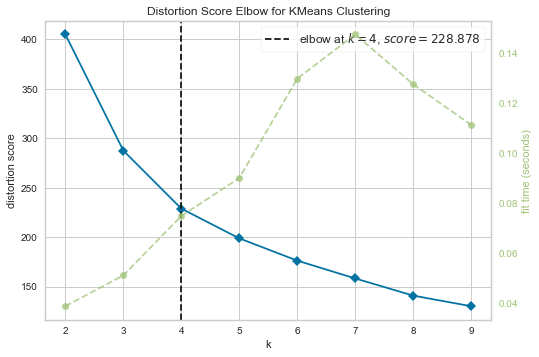

model4


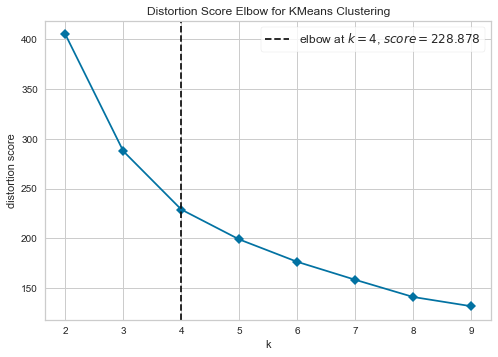

In [30]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model3 = KMeans(random_state=0,n_jobs=-1)
model4 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer3 = KElbowVisualizer(model3, k=(2,10), metric='distortion', timings=True)
visualizer4 = KElbowVisualizer(model4, k=(2,10), metric='distortion', timings=False)
# Fit the data and visualize
print('model3')
visualizer3.fit(pca_minmax_df)    
visualizer3.poof()
plt.show()

print('model4')
visualizer4.fit(pca_minmax_df)    
visualizer4.poof()
plt.show()

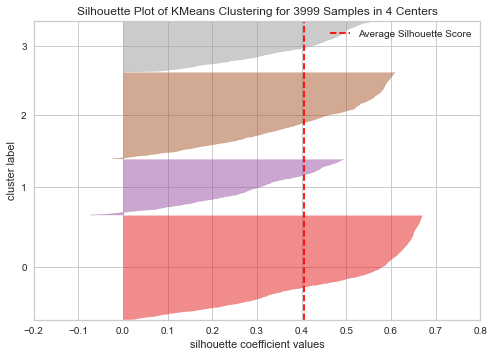

In [101]:
# Instantiate the clustering model and visualizer 

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model3 = KMeans(4)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(pca_minmax_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [31]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_data, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)


For n_clusters = 2 The average silhouette_score is : 0.14766013760214977
For n_clusters = 3 The average silhouette_score is : 0.14766013760214977
For n_clusters = 4 The average silhouette_score is : 0.14766013760214977
For n_clusters = 5 The average silhouette_score is : 0.14766013760214977
For n_clusters = 6 The average silhouette_score is : 0.14766013760214977
For n_clusters = 7 The average silhouette_score is : 0.14766013760214977
For n_clusters = 8 The average silhouette_score is : 0.14766013760214977
For n_clusters = 9 The average silhouette_score is : 0.14766013760214977


Conclusion:
    
=> By taking pca_minmax_df data it gives minimum number of cluster =4 with silhoette score = 0.1476

=> If we check silhouette score with standardize data pca kmeans model 0.36>0.14 

=> So we will take PCA which is applied on normalizatied data. 

=> Since the score is very less. Best score alwways close to +1.

In [32]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model1 = KMeans(n_clusters=6, random_state=0,n_jobs=-1)
y_predict1 = model1.fit_predict(pca_std_data)
y_predict1.shape

(3999,)

In [111]:

model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Cluster'])


In [110]:
model1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([data1.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


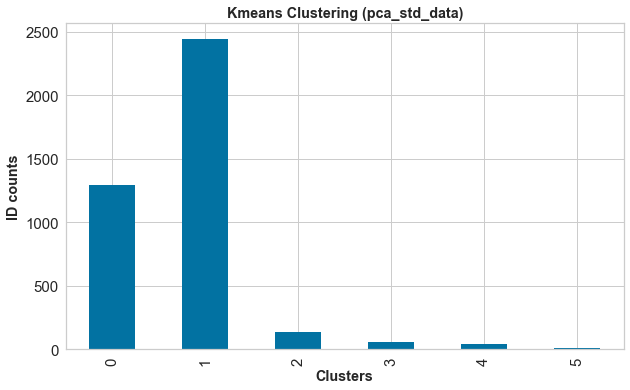

In [36]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Cluster']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_data)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [37]:
Kmeans_df.Kmeans_Cluster.value_counts()

1    2444
0    1297
2     141
3      59
4      43
5      15
Name: Kmeans_Cluster, dtype: int64

### Hierarchical Clustering

In [38]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

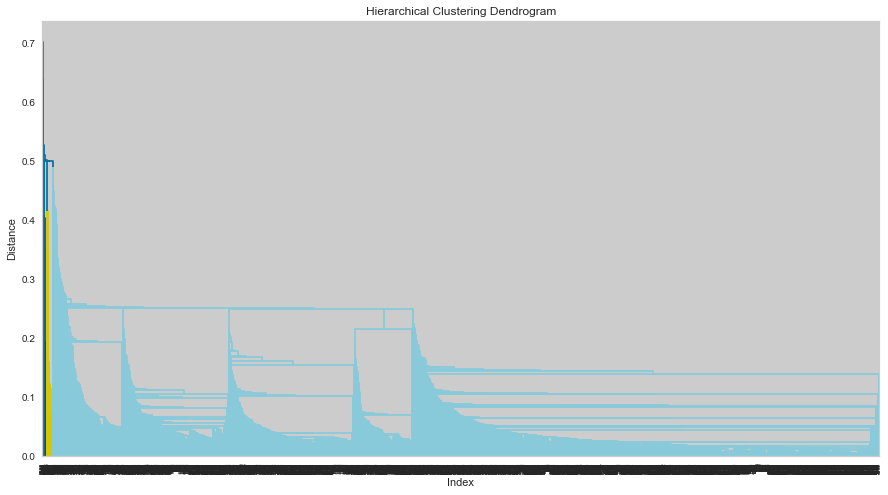

In [62]:
plt.figure(figsize=(15,8))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='single'))

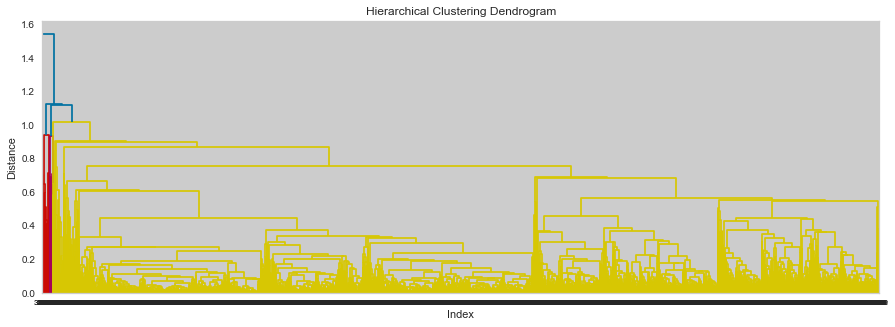

In [63]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
z = linkage(data_norm, method="average",metric="euclidean") ## distance between the clusters , method= average 

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

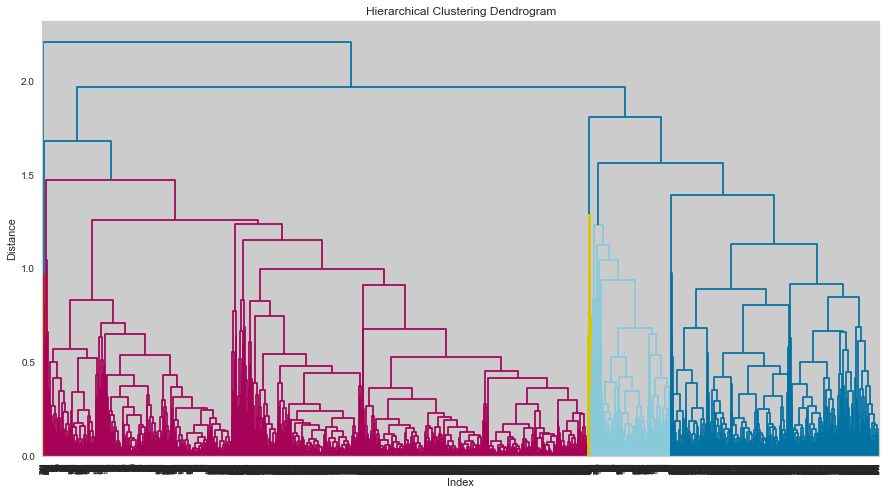

In [64]:
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

In [39]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [40]:
# save clusters for chart
y_hc = hc.fit_predict(data_norm)
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
Clusters=pd.DataFrame(y_hc,columns=['H_Clusters'])
Clusters.head()

,H_Clusters
0,0
1,0
2,0
3,0
4,0


hc_data['h_clusters']=hc.labels_
hc_data

In [43]:
hc_df = pd.concat([data1.copy(), Clusters], axis=1)
hc_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [45]:
hc_df.H_Clusters.value_counts()

0    3997
1       1
2       1
Name: H_Clusters, dtype: int64

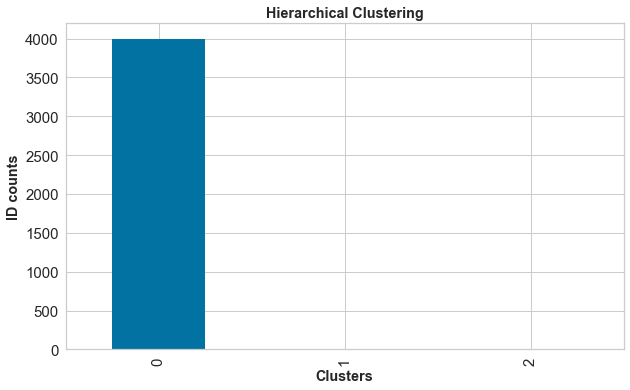

In [47]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hc_df.groupby(['H_Clusters']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### DBSCAN clustering

In [55]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [65]:
data_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [83]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(pca_std_data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [84]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [85]:
cl=pd.DataFrame(dbscan.labels_,columns=['dbcluster'])

In [86]:
cl

,dbcluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,-1
3997,0


In [87]:
db_df=pd.concat([cl,data],axis=1)
db_df

,dbcluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0,28143,0,1,1,1,174,1,0,0,7000
1,0,19244,0,1,1,1,215,2,0,0,6968
2,0,41354,0,1,1,1,4123,4,0,0,7034
3,0,14776,0,1,1,1,500,1,0,0,6952
4,-1,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...,...
3994,0,18476,0,1,1,1,8525,4,200,1,1403
3995,0,64385,0,1,1,1,981,5,0,0,1395
3996,-1,73597,0,3,1,1,25447,8,0,0,1402
3997,0,54899,0,1,1,1,500,1,500,1,1401


In [88]:
db_df.dbcluster.value_counts()

 0    2663
-1    1311
 1      15
 2      10
Name: dbcluster, dtype: int64

dbdata = data.loc[:, ~data.columns.duplicated()]